# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import warnings

In [2]:
warnings.filterwarnings('ignore')

# Reading Dataset

In [3]:
df = pd.read_csv('ml-100k/u.data',sep='\t')
df.head()

,196,242,3,881250949
0,186,302,3,891717742
1,22,377,1,878887116
2,244,51,2,880606923
3,166,346,1,886397596
4,298,474,4,884182806


In [4]:
df.shape

(99999, 4)

# Adding Column Names

In [5]:
columns_name = ["user_id","item_id","rating","timestamp"]
df = pd.read_csv('ml-100k/u.data',sep='\t',names=columns_name)
df.head()

,user_id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [6]:
df.shape

(100000, 4)

# Checking Unique Users

In [7]:
df['user_id'].nunique()

943

# Checking Unique Movies

In [8]:
df['item_id'].nunique()

1682

# Getting Movies Name

In [9]:
movies_title = pd.read_csv('ml-100k/u.item',sep='\|',header=None,encoding='ISO-8859-1')

In [10]:
movies_title.shape

(1682, 24)

In [11]:
# Including ID and Names only
movies_title = movies_title[[0,1]]
movies_title.columns = ['item_id','title']
movies_title.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


# Merging Data and Names 

In [12]:
df = pd.merge(df,movies_title,on='item_id')
df.head()

,user_id,item_id,rating,timestamp,title
0,196,242,3,881250949,Kolya (1996)
1,63,242,3,875747190,Kolya (1996)
2,226,242,5,883888671,Kolya (1996)
3,154,242,3,879138235,Kolya (1996)
4,306,242,5,876503793,Kolya (1996)


# Exploratory Data Analysis

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')

In [14]:
# excluding user_id, item_id & timestamp
df.groupby('title').mean()['rating']

title
'Til There Was You (1997)                2.333333
1-900 (1994)                             2.600000
101 Dalmatians (1996)                    2.908257
12 Angry Men (1957)                      4.344000
187 (1997)                               3.024390
                                           ...   
Young Guns II (1990)                     2.772727
Young Poisoner's Handbook, The (1995)    3.341463
Zeus and Roxanne (1997)                  2.166667
unknown                                  3.444444
Á köldum klaka (Cold Fever) (1994)       3.000000
Name: rating, Length: 1664, dtype: float64

In [15]:
# getting movies with highest rating
df.groupby('title').mean()['rating'].sort_values(ascending=False).head()

title
They Made Me a Criminal (1939)                5.0
Marlene Dietrich: Shadow and Light (1996)     5.0
Saint of Fort Washington, The (1993)          5.0
Someone Else's America (1995)                 5.0
Star Kid (1997)                               5.0
Name: rating, dtype: float64

In [16]:
# getting count of users per movie
df.groupby('title').count()['rating']

title
'Til There Was You (1997)                  9
1-900 (1994)                               5
101 Dalmatians (1996)                    109
12 Angry Men (1957)                      125
187 (1997)                                41
                                        ... 
Young Guns II (1990)                      44
Young Poisoner's Handbook, The (1995)     41
Zeus and Roxanne (1997)                    6
unknown                                    9
Á köldum klaka (Cold Fever) (1994)         1
Name: rating, Length: 1664, dtype: int64

In [17]:
# most rated movie by users
df.groupby('title').count()['rating'].sort_values(ascending=False)

title
Star Wars (1977)                      583
Contact (1997)                        509
Fargo (1996)                          508
Return of the Jedi (1983)             507
Liar Liar (1997)                      485
                                     ... 
Great Day in Harlem, A (1994)           1
Other Voices, Other Rooms (1997)        1
Good Morning (1971)                     1
Girls Town (1996)                       1
Á köldum klaka (Cold Fever) (1994)      1
Name: rating, Length: 1664, dtype: int64

In [18]:
# creating dataFrame of ratings
ratings = pd.DataFrame(df.groupby('title').mean()['rating'])
ratings.head()

,rating
title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390


In [19]:
# adding count of users
ratings['num_of_ratings'] = pd.DataFrame(df.groupby('title').count()['rating'])
ratings.head()

,rating,num_of_ratings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


In [20]:
ratings.sort_values(by='rating',ascending=False)

,rating,num_of_ratings
title,,
They Made Me a Criminal (1939),5.0,1
Marlene Dietrich: Shadow and Light (1996),5.0,1
"Saint of Fort Washington, The (1993)",5.0,2
Someone Else's America (1995),5.0,1
Star Kid (1997),5.0,3
...,...,...
"Eye of Vichy, The (Oeil de Vichy, L') (1993)",1.0,1
King of New York (1990),1.0,1
Touki Bouki (Journey of the Hyena) (1973),1.0,1


# Plotting graphs to check ratings with less number user ratings

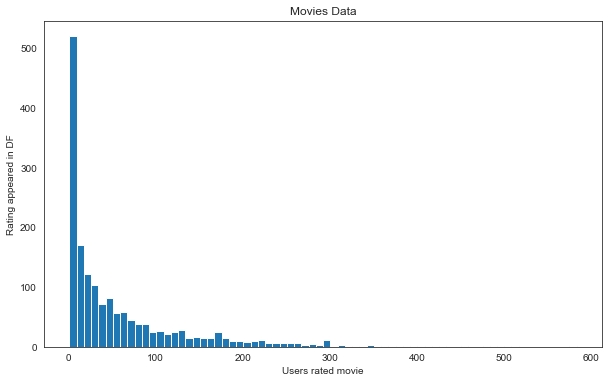

In [21]:
plt.figure(figsize=(10,6))
plt.hist(ratings['num_of_ratings'],bins=70)
plt.title("Movies Data")
plt.xlabel("Users rated movie")
plt.ylabel("Rating appeared in DF")
plt.show()

# from below histogram, it can be seen that 
# around 500 movies are rated 0-10 times

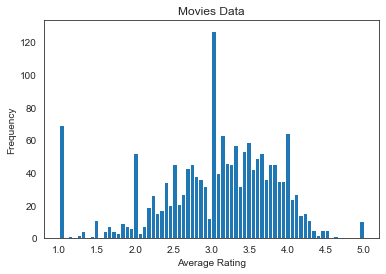

In [22]:
plt.hist(ratings['rating'],bins=70)
plt.title("Movies Data")
plt.xlabel("Average Rating")
plt.ylabel("Frequency")
plt.show()

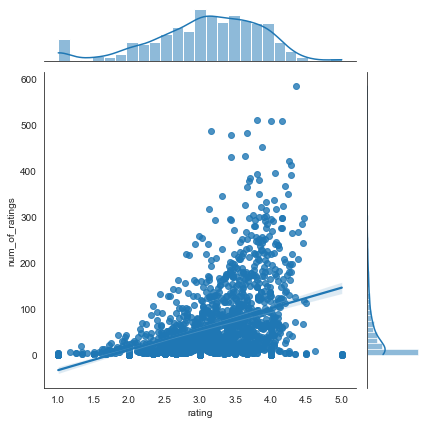

In [23]:
# joint plot - number of rating vs rating
sns.jointplot(x='rating',y='num_of_ratings',data=ratings,kind='reg')

# Creating Movie Recommendation

In [24]:
df.head()

,user_id,item_id,rating,timestamp,title
0,196,242,3,881250949,Kolya (1996)
1,63,242,3,875747190,Kolya (1996)
2,226,242,5,883888671,Kolya (1996)
3,154,242,3,879138235,Kolya (1996)
4,306,242,5,876503793,Kolya (1996)


In [25]:
# user rating per movie
movie_mat = df.pivot_table(index='user_id',columns='title',values='rating')
movie_mat

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,2.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,...,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,4.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
940,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
941,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
starwars_user_ratings = movie_mat['Star Wars (1977)']
starwars_user_ratings.head()

user_id
1    5.0
2    5.0
3    NaN
4    5.0
5    4.0
Name: Star Wars (1977), dtype: float64

In [27]:
similar_to_starwars = movie_mat.corrwith(starwars_user_ratings)
corr_of_starwars = pd.DataFrame(similar_to_starwars,columns=['Correlation'])
corr_of_starwars.dropna(inplace=True)
corr_of_starwars.head()

,Correlation
title,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398


In [28]:
# highest correlation with starwars
corr_of_starwars.sort_values(by='Correlation',ascending=False)

,Correlation
title,
Hollow Reed (1996),1.0
Commandments (1997),1.0
Cosi (1996),1.0
No Escape (1994),1.0
Stripes (1981),1.0
...,...
Roseanna's Grave (For Roseanna) (1997),-1.0
For Ever Mozart (1996),-1.0
American Dream (1990),-1.0


In [29]:
corr_of_starwars = corr_of_starwars.join(ratings['num_of_ratings'])
corr_of_starwars.head()

,Correlation,num_of_ratings
title,,
'Til There Was You (1997),0.872872,9
1-900 (1994),-0.645497,5
101 Dalmatians (1996),0.211132,109
12 Angry Men (1957),0.184289,125
187 (1997),0.027398,41


In [30]:
corr_of_starwars[corr_of_starwars['num_of_ratings'] > 100].sort_values(by='Correlation',ascending=False)

,Correlation,num_of_ratings
title,,
Star Wars (1977),1.000000,583
"Empire Strikes Back, The (1980)",0.747981,367
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130
...,...,...
"Edge, The (1997)",-0.127167,113
As Good As It Gets (1997),-0.130466,112
Crash (1996),-0.148507,128


# Predict Funtion

In [31]:
def predict_movies(movie_name):
    # user ratings of movie_name
    movie_user_ratings = movie_mat[movie_name]
    # corr of movie_name's ratings with other movies
    similar_to_movie = movie_mat.corrwith(movie_user_ratings)
    
    # converting similar_to_movie to dataframe
    corr_movie = pd.DataFrame(similar_to_movie,columns=['Correlation'])
    # dropping NaN values
    corr_movie.dropna(inplace=True)
    
    # joining ratings with number_of_ratings
    corr_movie = corr_movie.join(ratings['num_of_ratings'])
    # showing those movies whose corr & number_of_ratings is highest
    predictions = corr_movie[corr_movie['num_of_ratings'] > 100].sort_values(by='Correlation',ascending=False)
    
    # returning top 3 recommended movies
    return predictions.iloc[1:4]

In [32]:
predict_movies('Titanic (1997)')

,Correlation,num_of_ratings
title,,
"River Wild, The (1994)",0.497600,146
"Abyss, The (1989)",0.472103,151
Bram Stoker's Dracula (1992),0.443560,120
